The data shows the information of American colleges and universities in 1995, the detail as below. And we would like to classify good colleges and universities. <br>
[ACollege1995R.csv] Columns:<br>
app - No. of applicants received<br>
acc - No. of applicants accepted<br>
enrol - No. of new students enrolled<br>
ftime - No. of full-time undergraduates<br>
ptime - No. of part-time undergraduate<br>
instate - In-state tuition<br>
outstate - Out-state tuition<br>
rbcost - Room and board cost<br>
bkcost - Estimated book cost<br>
phd - % of faculty with Ph.D.<br>
sfratio - Student/faculty ratio<br>
expend - Instructional expenditure per student<br>
grad - Graduation rate<br>
good - With 30%+ new students from top 10% high school class.

In [1]:
library(rpart)
library(rpart.plot)
set.seed(852)
data = read.csv('../ACollege1995R.csv')

In [2]:
TnE = function(train_y, test_x, test_y, model) {
    train_cl = max.col(predict(model))
    train_table = table(train_cl, train_y)
    error0 = (train_table[2] + train_table[3]) / sum(train_table)
    test_cl = max.col(predict(model, test_x))
    test_table = table(test_cl, test_y)
    error1 = (test_table[2] + test_table[3]) / sum(test_table)
    print(train_table)
    cat('Training error is',error0,'\n\n')
    print(test_table)
    cat('Testing error is',error1,'\n')
}

In [3]:
id = sample(1:dim(data)[1], size=dim(data)[1]*0.7,replace=F)
train = data[id,]
test = data[-id,]

n= 573 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 573 155 0 (0.72949389 0.27050611)  
   2) expend< 11200 472  80 0 (0.83050847 0.16949153)  
     4) phd< 76.5 331  35 0 (0.89425982 0.10574018) *
     5) phd>=76.5 141  45 0 (0.68085106 0.31914894)  
      10) expend< 9144.5 94  20 0 (0.78723404 0.21276596) *
      11) expend>=9144.5 47  22 1 (0.46808511 0.53191489)  
        22) expend>=9736 29  11 0 (0.62068966 0.37931034) *
        23) expend< 9736 18   4 1 (0.22222222 0.77777778) *
   3) expend>=11200 101  26 1 (0.25742574 0.74257426)  
     6) expend< 14234.5 51  24 1 (0.47058824 0.52941176)  
      12) grad< 75.5 28   9 0 (0.67857143 0.32142857)  
        24) rbcost>=4682.5 14   1 0 (0.92857143 0.07142857) *
        25) rbcost< 4682.5 14   6 1 (0.42857143 0.57142857) *
      13) grad>=75.5 23   5 1 (0.21739130 0.78260870) *
     7) expend>=14234.5 50   2 1 (0.04000000 0.96000000) *


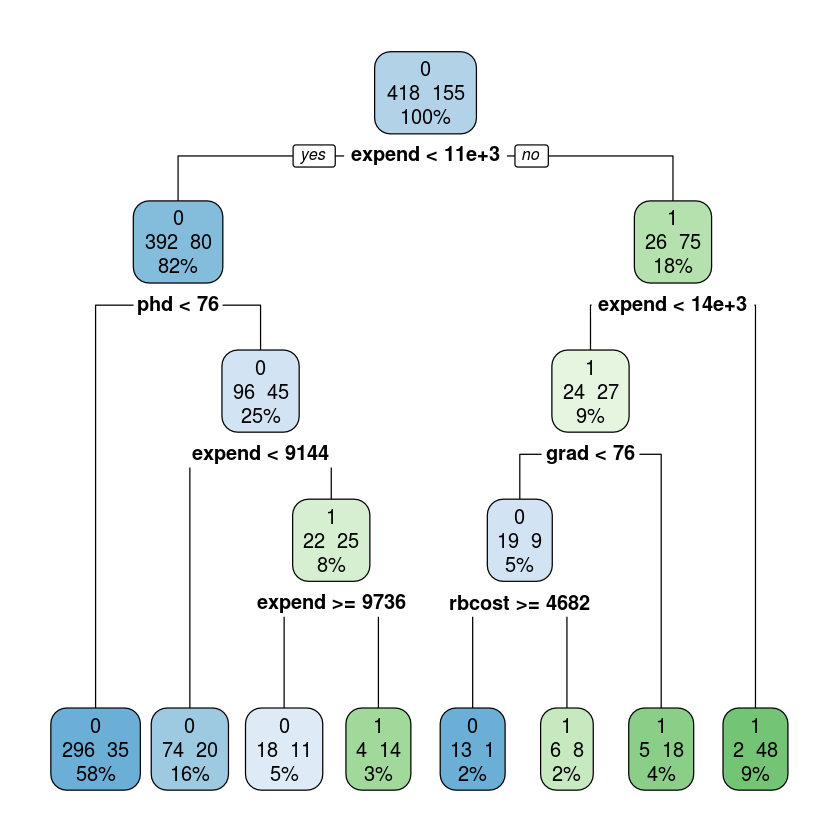

In [4]:
ctree = rpart(good~.,data=train,method='class',maxdepth=4)
print(ctree)
rpart.plot(ctree,extra=101)

In [5]:
TnE(train$good, test[,1:13], test$good, ctree)

        train_y
train_cl   0   1
       1 401  67
       2  17  88
Training error is 0.1465969 

       test_y
test_cl   0   1
      1 166  39
      2   8  33
Testing error is 0.1910569 
